# EJERCICIO 3 - PRACTICA 2


####   ● EDAD es un atributo numérico que indica la edad del 
paciente

####   
● RIESGO es el nivel de riesgo del pacient

####   .
● EXAMEN indica si debe realizarse un examen extra.

In [102]:
import pandas as pd

# Crear el diccionario con los datos
data = {
    'edad': [55, 56, 58, 56, 59, 57, 60, 53, 59],
    'riesgo': ['ALTO', 'MEDIO', 'MEDIO', 'BAJO', 'BAJO', 'MEDIO', 'BAJO', 'ALTO', 'MEDIO'],
    'examen': ['SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

   edad riesgo examen
0    55   ALTO     SI
1    56  MEDIO     NO
2    58  MEDIO     SI
3    56   BAJO     NO
4    59   BAJO     NO
5    57  MEDIO     SI
6    60   BAJO     SI
7    53   ALTO     NO
8    59  MEDIO     SI


In [104]:
#Para obtener transformar el atributo nominal RIESGO en uno 
#numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y ALTO = 3

mapeo = {'riesgo': {'ALTO':3, 'BAJO':1 , 'MEDIO':2}}

df.replace(mapeo, inplace=True)
print(df)

   edad  riesgo examen
0    55       3     SI
1    56       2     NO
2    58       2     SI
3    56       1     NO
4    59       1     NO
5    57       2     SI
6    60       1     SI
7    53       3     NO
8    59       2     SI


C:\Users\W10\AppData\Local\Temp\ipykernel_17712\3079498243.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


In [106]:
# calculo correlacion lineal entre edad y riesgo:

correlation = df['edad'].corr(df['riesgo'])

print(f'La correlación entre "Edad" y "Riesgo" es: {correlation:.2f}')

La correlación entre "Edad" y "Riesgo" es: -0.72


### Interpretacion del resultado: El modulo del coeficiente es un valor cercano a |1|, lo que indica que la relacion lineal entre la edad y el riesgo es bastante fuerte. Al ser un valor negativo, indica que cuando la edad crece, el riesgo decrece y viceversa

### Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los 
ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo
EXAMEN. Los pesos obtenidos fueron los siguientes
:###  
W(EDAD) = 0.0807 W(RIESGO) = 0.074 Sesgo o bias = -0.0742

In [110]:
# -- NORMALIZAR entre 0 y 1 RIESGO Y EDAD --
miniedad = df['edad'].min()
maxiedad = df['edad'].max()
df['edad']= (df['edad']-miniedad)/(maxiedad-miniedad)

#df[['edad', 'edadLineal']].describe()

miniriesgo = df['riesgo'].min()
maxiriesgo = df['riesgo'].max()
df['riesgo']= (df['riesgo']-miniriesgo)/(maxiriesgo-miniriesgo)

#df[['riesgo', 'riesgoLineal']].describe()

# Convertir la columna 'examen?' a binario   ---> NUMERIZACION BINARIA
df['examen'] = df['examen'].apply(lambda x: 1 if x == 'SI' else 0)



print(df)

       edad  riesgo  examen
0  0.285714     1.0       1
1  0.428571     0.5       0
2  0.714286     0.5       1
3  0.428571     0.0       0
4  0.857143     0.0       0
5  0.571429     0.5       1
6  1.000000     0.0       1
7  0.000000     1.0       0
8  0.857143     0.5       1


In [112]:
import numpy as np

# Separar las características y la etiqueta
X = df[['edad', 'riesgo']].values # X --> vector de atributos
y = df['examen'].values           # Y --> atributo a predecir == examen

# Definir los pesos y el sesgo --> uso datos proporcionados
weights = np.array([-0.076,  -0.071])
bias = 0.071

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(' ---------------')

# Mostrar resultados individuales
results = pd.DataFrame({
    'edad': df['edad'],
    'riesgo': df['riesgo'],
    'examen': df['examen'],
    'Real': y,
    'Predicción': predictions
})

# Añadir columna de aciertos
results['Correcto'] = results['Real'] == results['Predicción']


# Contar el número de aciertos
num_correctos = results['Correcto'].sum()
print(f'Número de predicciones correctas: {num_correctos} de {len(results)}')

print(results)

Accuracy: 0.00%
 ---------------
Número de predicciones correctas: 0 de 9
       edad  riesgo  examen  Real  Predicción  Correcto
0  0.285714     1.0       1     1           0     False
1  0.428571     0.5       0     0           1     False
2  0.714286     0.5       1     1           0     False
3  0.428571     0.0       0     0           1     False
4  0.857143     0.0       0     0           1     False
5  0.571429     0.5       1     1           0     False
6  1.000000     0.0       1     1           0     False
7  0.000000     1.0       0     0           1     False
8  0.857143     0.5       1     1           0     False


In [114]:
#Según los pesos obtenidos por el perceptrón, la recomendación para un paciente de 55 años con riesgo MEDIO es que NO se realice el examen

# Definir los datos del paciente
edad = 55
riesgo = 0.5  # Valor numerizado para "MEDIO"

# Crear el vector de características
X_nuevo = np.array([edad, riesgo])

# Usar la función de predicción
prediccion = predict(X_nuevo, weights, bias)

# Imprimir la recomendación
if prediccion == 1:
    print(f"Para un paciente de {edad} años con riesgo MEDIO, se recomienda realizar el examen.")
else:
    print(f"Para un paciente de {edad} años con riesgo MEDIO, NO se recomienda realizar el examen.")

Para un paciente de 55 años con riesgo MEDIO, NO se recomienda realizar el examen.


### ¿Cuál será la respuesta del perceptrón para los siguientes valores?
### (EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)

In [64]:
datosNuevos = { 'edad': [50, 51, 54] ,  'riesgo': ['BAJO', 'MEDIO', 'ALTO'] }
df1 = pd.DataFrame(datosNuevos)
print(df1)

#numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y ALTO = 3
mapeo = {'riesgo': {'ALTO':3, 'BAJO':1 , 'MEDIO':2}}
df1.replace(mapeo, inplace=True)

#Normalizacion de columna riesgo:
min = df1['riesgo'].min()
max = df1['riesgo'].max()
df1['riesgo']= (df1['riesgo']-min)/(max-min)

print(df1)


X = df1[['edad', 'riesgo']].values # X --> vector de atributos


#y = df['examen'].values           # Y --> atributo a predecir == examen

# Definir los pesos y el sesgo --> uso datos proporcionados
weights = np.array([0.0807,  0.074])
bias = -0.0742

# Función de activación
def step_function(x):
    return 1 if x >= 0 else 0

# Predicción del perceptrón
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return step_function(linear_output)

# Evaluar el perceptrón en todos los ejemplos
predictions = np.array([predict(x, weights, bias) for x in X])

# Mostrar resultados individuales
results = pd.DataFrame({
    'edad': df1['edad'],
    'riesgo': df1['riesgo'],
    #'Real': y,
    'Predicción': predictions
})

print(results)

   edad riesgo
0    50   BAJO
1    51  MEDIO
2    54   ALTO
   edad  riesgo
0    50     0.0
1    51     0.5
2    54     1.0
   edad  riesgo  Predicción
0    50     0.0           1
1    51     0.5           1
2    54     1.0           1


C:\Users\W10\AppData\Local\Temp\ipykernel_17712\2106783940.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(mapeo, inplace=True)


## se predijo en los 3 casos que si

# -------- Apartado del cuestionario

In [86]:
# Con los datos del ejercicio 3 de la práctica 2, un tercero numerizó el atributo RIESGO utilizando una representación de entero único,  
# normalizó los atributos de manera lineal entre 0 y 1 y utilizó los ejemplos de la tabla 1 para entrenar un perceptrón para predecir 
# el atributo EXAMEN. Los pesos obtenidos fueron los siguientes:

#  W(EDAD) = -0.076      W(RIESGO) = -0.071     Sesgo o bias = 0.071


In [88]:

 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [90]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

# Entrenamiento:

In [93]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df.iloc[:,:-1])   # X contiene todas las columnas menos la columna 'Clase' --> variables de entrada
T = np.array((df['examen'] == 'Tipo2') * 1)  # T es la variable objetivo que se intenta predecir. se está transformando la columna Clase en un array 
                                           # binario donde 1 indica que el tipo de semilla es Tipo2 y 0 indica que es cualquier otro tipo. 
                                           # Esto se hace para poder predecir si la semilla es de Tipo2 o no.
nColum = ['Otra', 'tipo2']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

#normalizarEntrada = 1  # 1 si normaliza; 0 si no                   #se normalizan los datos
#if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
 #   normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
   # X_train = normalizador.fit_transform(X_train)
   # X_test  = normalizador.transform(X_test)

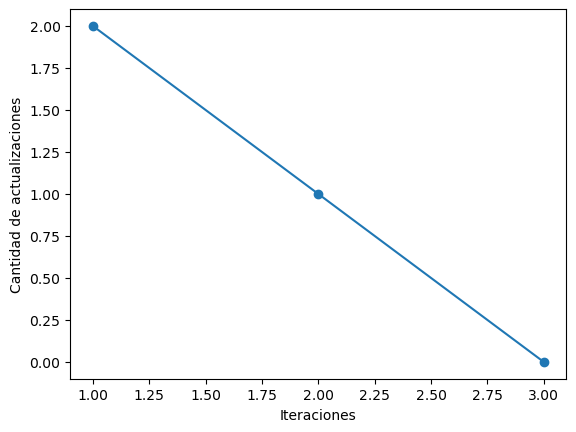

In [95]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [100]:
print('Pesos:')
print(ppn.w_)
print('bias:')
print(ppn.b_)

Pesos:
[-0.22752359 -0.44920872]
bias:
0.06073429300651004
